# Avaliação e validação de experimentos


In [1]:
import numpy as np
import pandas as pd

In [2]:
# Semente aleatória para reproducibilidade dos experimentos (reproducão dos experimentos)

SEED = 17

In [3]:
df_raw = pd.read_csv('data/htru_2_col.csv')

print(df_raw.shape)

(17897, 9)


In [4]:
df_raw.head(9).T

,0,1,2,3,4,5,6,7,8
profile_mean,102.507812,103.015625,136.750000,88.726562,93.570312,119.484375,130.382812,107.250000,107.257812
profile_stdev,58.882430,39.341649,57.178449,40.672225,46.698114,48.765059,39.844056,52.627078,39.496488
profile_skewness,0.465318,0.323328,-0.068415,0.600866,0.531905,0.031460,-0.158323,0.452688,0.465882
profile_kurtosis,-0.515088,1.051164,-0.636238,1.123492,0.416721,-0.112168,0.389540,0.170347,1.162877
dm_mean,1.677258,3.121237,3.642977,1.178930,1.636288,0.999164,1.220736,2.331940,4.079431
dm_stdev,14.860146,21.744669,20.959280,11.468720,14.545074,9.279612,14.378941,14.486853,24.980418
dm_skewness,10.576487,7.735822,6.896499,14.269573,10.621748,19.206230,13.539456,9.001004,7.397080
dm_kurtosis,127.393580,63.171909,53.593661,252.567306,131.394004,479.756567,198.236457,107.972506,57.784738
pulsar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
df_raw.info()
df_raw.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   profile_mean      17897 non-null  float64
 1   profile_stdev     17897 non-null  float64
 2   profile_skewness  17897 non-null  float64
 3   profile_kurtosis  17897 non-null  float64
 4   dm_mean           17897 non-null  float64
 5   dm_stdev          17897 non-null  float64
 6   dm_skewness       17897 non-null  float64
 7   dm_kurtosis       17897 non-null  float64
 8   pulsar            17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


,count,mean,std,min,25%,50%,75%,max
profile_mean,17897.0,111.078321,25.652705,5.812500,100.929688,115.078125,127.085938,192.617188
profile_stdev,17897.0,46.549021,6.843040,24.772042,42.375426,46.946435,51.022887,98.778911
profile_skewness,17897.0,0.477897,1.064056,-1.876011,0.027108,0.223241,0.473349,8.069522
profile_kurtosis,17897.0,1.770417,6.168058,-1.791886,-0.188528,0.198736,0.928206,68.101622
dm_mean,17897.0,12.614926,29.473637,0.213211,1.923077,2.801839,5.464883,223.392141
dm_stdev,17897.0,26.326918,19.471042,7.370432,14.437330,18.459977,28.428152,110.642211
dm_skewness,17897.0,8.303574,4.506217,-3.139270,5.781485,8.433872,10.702973,34.539844
dm_kurtosis,17897.0,104.859419,106.517270,-1.976976,34.957119,83.068996,139.310905,1191.000837
pulsar,17897.0,0.091580,0.288440,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split


df, _ = train_test_split(df_raw, train_size=1000, stratify=df_raw["pulsar"], random_state=SEED)



In [7]:
# To simplify the code, we will only use numeric features

X = df.drop(columns="pulsar")

yreg = df.pulsar
ycla = yreg > 0

print(X.shape)

(1000, 8)


## Classificação

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer

In [9]:
scorer = make_scorer(accuracy_score) # Teste outras

cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=SEED)
gscv = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)

algorithms = {
    'kNN':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler(feature_range=(0, 1))),
            ('selector', VarianceThreshold()),
            ('knn', KNeighborsClassifier())]),
        param_grid={
            'selector__threshold': [0, 0.01, 0.02, 0.03],
            'knn__n_neighbors': [1, 3, 5],
            'knn__p': [1, 2],
        },
        scoring=scorer,
        cv=gscv),


    'tree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(random_state=SEED))]),
        param_grid={
            'tree__max_depth': [5, 10, 20],
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),


    'bigtree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=SEED))]),
        param_grid={
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),


    'nb': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('selector', SelectKBest()),
            ('nb', GaussianNB())]),
        param_grid={
            'selector__k': [3, 5, 10],
        },
        scoring=scorer,
        cv=gscv),


    'svmlinear': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('svm', SVC(kernel='linear', random_state=SEED))]),
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
        },
        scoring=scorer,
        cv=gscv),

        
    'svmrbf': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA(random_state=SEED)),
            ('svm', SVC(kernel='rbf', random_state=SEED))]),
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
            'svm__gamma': [0.1, 1.0, 2.0],
        },
        scoring=scorer,
        cv=gscv),
}

In [10]:
from sklearn.model_selection import cross_val_score

result = {}
for alg, clf in algorithms.items():
  result[alg] = cross_val_score(clf, X, ycla, cv=cv)

result = pd.DataFrame.from_dict(result)

/Users/gabrielaidar/Desktop/Mestrado/aprendizado_de_maquina/_projeto/projeto-aprendizado-de-maquina/.venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(
/Users/gabrielaidar/Desktop/Mestrado/aprendizado_de_maquina/_projeto/projeto-aprendizado-de-maquina/.venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(
/Users/gabrielaidar/Desktop/Mestrado/aprendizado_de_maquina/_projeto/projeto-aprendizado-de-maquina/.venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(
/Users/gabrielaidar/Desktop/Mestrado/aprendizado_de_maquina/_projeto/projeto-aprendizado-de-maquina/.venv/lib/python3.11/site-p

In [11]:
print(result)

         kNN      tree   bigtree        nb  svmlinear    svmrbf
0   0.985075  0.985075  0.985075  0.970149   0.985075  0.970149
1   0.985075  0.970149  0.970149  1.000000   0.970149  0.970149
2   0.985075  1.000000  0.985075  0.955224   0.985075  0.985075
3   0.970149  0.955224  0.970149  0.925373   0.970149  0.970149
4   0.985075  0.985075  0.985075  0.985075   0.985075  0.985075
5   0.970149  0.970149  0.970149  0.970149   0.970149  0.970149
6   0.970149  0.970149  0.970149  0.970149   0.970149  0.970149
7   1.000000  1.000000  1.000000  0.985075   1.000000  0.970149
8   0.970149  0.970149  0.970149  0.970149   0.970149  0.955224
9   0.970149  1.000000  1.000000  1.000000   1.000000  1.000000
10  0.969697  0.954545  0.939394  0.954545   0.969697  0.954545
11  1.000000  1.000000  1.000000  1.000000   1.000000  0.984848
12  1.000000  0.984848  1.000000  0.969697   0.984848  1.000000
13  1.000000  0.984848  0.984848  1.000000   1.000000  1.000000
14  0.984848  0.984848  0.969697  0.9696

In [12]:
result.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std()))

kNN          0.98 ± 0.01
tree         0.98 ± 0.02
bigtree      0.98 ± 0.02
nb           0.98 ± 0.02
svmlinear    0.98 ± 0.01
svmrbf       0.98 ± 0.01
dtype: object

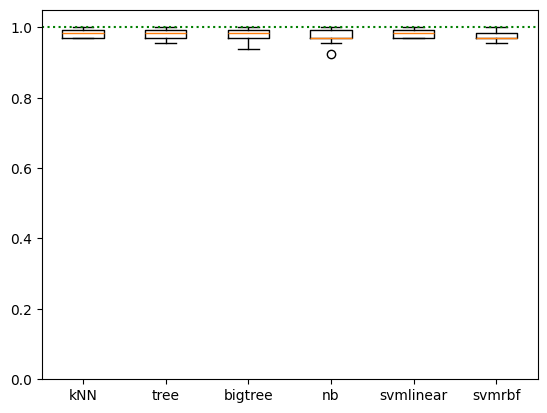

In [22]:
import matplotlib.pyplot as plt

plt.boxplot([ scores for alg, scores in result.items()])
plt.xticks(1 + np.arange(result.shape[1]), result.columns)

plt.axhline(1, linestyle="dotted", color="green")
plt.ylim(0,1.05)  # Nao mentir com dados para os coleguinhas

plt.show()